In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import mysql.connector  # to connect mysql with python for import, expoert data and do queries & other stuff connectively
import os      # -- used to interact with the operating system, like accessing files, directories, environment variables, or executing system commands.

# **DUMB THE DATA IN MYSQL DATABASE...**

In [2]:
# List of CSV files and their corresponding table names(To be created in which file will be stored in mysql)

# ================= ==== No need to run again as we have to load/dump datasets only once to mysql ==============================

# csv_files = [
#     # fileName , tableName
#     ('customers.csv','custoners'),  # Mistake as table name was expected to be 'customers' -> but custoners also works as it would be table name in mysql
#     ('orders.csv', 'orders'),
#     ('order_items.csv','order_items'),
#     ('sellers.csv', 'sales'),     # We will change table name as 'sellers' below
#     ('products.csv', 'products'),
#     ('geolocation.csv', 'geolocation'),
#     ('payments.csv', 'payments')
# ]


# # Connect to mysql database
# conn = mysql.connector.connect(
#     host="localhost",
#     user="root",
#     password="UMMU@112244",
#     database = "target_ecommerce_db"
# )

# # Create a cursor which is a database object that allows you to execute SQL queries and fetch results row by row from the database.
# cursor = conn.cursor()

# # ==========Folder containing the CSV files
# folder_path = 'C:/Users/umarm/Desktop/Data Analyst Work/Projects/Target Ecommerce Sales Analysis Project/Companys DataSet'

# def get_sql_type(dtype):      # ======== Function to set datatype for SQL DB (that sql server supports)- > used/called below
#     if pd.api.types.is_integer_dtype(dtype):
#         return 'INT'
#     elif pd.api.types.is_float_dtype(dtype):
#         return 'FLOAT'
#     elif pd.api.types.is_bool_dtype(dtype):
#         return 'BOOLEAN'
#     elif pd.api.types.is_datetime64_any_dtype(dtype):
#         return 'DATETIME'
#     else:
#         return 'TEXT'
        

# # =========== Traverse through each file -> put files in mysql tables, adjust NaN(which must be as null in mysql table) etc
# for csv_file, table_name in csv_files:
#     file_path = os.path.join(folder_path, csv_file)
    
#     # ========= Read the CSV file into a pandas DataFrame
#     df = pd.read_csv(file_path)
    
#     # Replace NaN with None to handle SQL NULL
#     df = df.where(pd.notnull(df), None)
    
#     # ====== Debugging: Check for NaN values -> 
#     print(f"Processing {csv_file}")
#     print(f"NaN values before replacement:\n{df.isnull().sum()}\n")

#     # ======= Clean column names -> repcaing " " , "." and "-" with "_" of column names of file...
#     df.columns = [col.replace(' ', '_').replace('-', '_').replace('.', '_') for col in df.columns]

#     # ======== Generate the CREATE TABLE statement with appropriate data types--> AS MYSQL (executed using cursor below)
#     columns = ', '.join([f'`{col}` {get_sql_type(df[col].dtype)}' for col in df.columns])   # Column name with data types for MYSQL DB (calling above data type setting function)
#     create_table_query = f'CREATE TABLE IF NOT EXISTS `{table_name}` ({columns})'
#     cursor.execute(create_table_query)

#     # ========= Insert DataFrame(above) data into the MySQL table -> created just above
#     for _, row in df.iterrows():
#         # Convert row to tuple and handle NaN/None explicitly
#         values = tuple(None if pd.isna(x) else x for x in row)
#         sql = f"INSERT INTO `{table_name}` ({', '.join(['`' + col + '`' for col in df.columns])}) VALUES ({', '.join(['%s'] * len(row))})"
#         cursor.execute(sql, values)

#     # Commit the transaction for the current CSV file
#     conn.commit()
#============ Function complete 

# # Close the connection
# conn.close()


In [3]:
# Create connection to mysql database
conn = mysql.connector.connect(
    host="localhost",
    user="root",
    password="UMMU@112244",
    database = "target_ecommerce_db"
)

# Create a cursor which is a database object that allows you to execute SQL queries and fetch results row by row from the database.
cursor = conn.cursor()



# ***I did mistake above in naming of table "custoners" -> Change to customers***

In [4]:
#======================== CHANGED by running once" -> SO no need to run again (COMMENT IT)

# # ======== Change the name from 'custoners' to 'customers'
# old_table_name = "custoners"  # Replace with the current table name
# new_table_name = "customers"  # Replace with the desired new table name
# # Construct the SQL query to rename the table
# rename_table_query = f"RENAME TABLE {old_table_name} TO {new_table_name}"
# # Execute above sql query
# cursor.execute(rename_table_query)

In [5]:

# # ======== RUn once , thus Changed the name from 'sales' to 'sellers' -> COMMENT IT so that we don't change table name again as it is already changed by running once
# old_table_name = "sales"  # Replace with the 'sellers' table name
# new_table_name = "sellers"  # Replace with the desired new table name
# # Construct the SQL query to rename the table
# rename_table_query = f"RENAME TABLE {old_table_name} TO {new_table_name}"
# cursor.execute(rename_table_query)

# *Basic Extractions...*

**================= 1. cities where customers are located. ===========**

In [6]:
query = "SELECT distinct customer_city FROM customers"
cursor.execute(query)
# ====== FETCH ALL cities that we have got after executing above sql query
cities = cursor.fetchall()
cities   # display list of all cities fetched and stored in cities variable...

[('franca',),
 ('sao bernardo do campo',),
 ('sao paulo',),
 ('mogi das cruzes',),
 ('campinas',),
 ('jaragua do sul',),
 ('timoteo',),
 ('curitiba',),
 ('belo horizonte',),
 ('montes claros',),
 ('rio de janeiro',),
 ('lencois paulista',),
 ('caxias do sul',),
 ('piracicaba',),
 ('guarulhos',),
 ('pacaja',),
 ('florianopolis',),
 ('aparecida de goiania',),
 ('santo andre',),
 ('goiania',),
 ('cachoeiro de itapemirim',),
 ('sao jose dos campos',),
 ('sao roque',),
 ('camacari',),
 ('resende',),
 ('sumare',),
 ('novo hamburgo',),
 ('sao luis',),
 ('sao jose',),
 ('santa barbara',),
 ('ribeirao preto',),
 ('ituiutaba',),
 ('taquarituba',),
 ('sao jose dos pinhais',),
 ('barrinha',),
 ('parati',),
 ('dourados',),
 ('trindade',),
 ('cascavel',),
 ('fortaleza',),
 ('brasilia',),
 ('pelotas',),
 ('porto alegre',),
 ('salto',),
 ('jundiai',),
 ('cacapava',),
 ('sao vicente',),
 ('uberlandia',),
 ('botelhos',),
 ('sao goncalo',),
 ('araucaria',),
 ('nova iguacu',),
 ('areia branca',),
 ('campo

**============ 2. Orders placed in the year of 2017.================**

In [7]:
cursor.close()   # It was giving error, so i closed cursor and connected again with sql connection 'conn'
cursor = conn.cursor()

In [8]:
query = """ SELECT COUNT(*) AS Orders_Count
FROM orders
WHERE YEAR(order_purchase_timestamp) = "2017";"""

cursor.execute(query)  
# To show 
Orders_2017 = cursor.fetchall()  # Result retreived as list of tuples like above (Check like : print(Orders_2017))
print("Total orders in 2017:", Orders_2017[0][0])


Total orders in 2017: 45101


**3.=================== Category wise sales.================**

In [9]:
query = """SELECT UPPER(p.product_category), ROUND(SUM(pmt.payment_value),2) AS sales
FROM products AS p
INNER JOIN 
order_items AS oi
ON p.product_id = oi.product_id
INNER JOIN payments AS pmt
ON pmt.order_id = oi.order_id
GROUP BY p.product_category
ORDER BY sales DESC"""

cursor.execute(query);
category_sales= cursor.fetchall();
category_sales;

In [10]:
# Let's show above extraction using dataframe... ==> Extract top 10 categories
sales_df = pd.DataFrame(data=category_sales, columns=["Product Category", "Sales"])
print("Top 10 categories:")
sales_df.head(10)

Top 10 categories:


,Product Category,Sales
0,BED TABLE BATH,1712553.67
1,HEALTH BEAUTY,1657373.12
2,COMPUTER ACCESSORIES,1585330.45
3,FURNITURE DECORATION,1430176.39
4,WATCHES PRESENT,1429216.68
5,SPORT LEISURE,1392127.56
6,HOUSEWARES,1094758.13
7,AUTOMOTIVE,852294.33
8,GARDEN TOOLS,838280.75
9,COOL STUFF,779698.00


**4. =================== Percentage of orders that were paid in installments.============**

In [11]:
query = """ WITH temp AS (
	SELECT COUNT(*) AS with_installments
    FROM payments 
    WHERE payment_installments >= 2
    )
SELECT ROUND( (with_installments / (SELECT COUNT(*) FROM payments) ) * 100, 2) AS perc_of_installments
FROM temp; """

cursor.execute(query);
perc_of_installm = cursor.fetchall();
print("Percentage of customers who purchased in installments: ", perc_of_installm[0][0])

Percentage of customers who purchased in installments:  49.42


**5. =================== Customers from each state. ===============**

In [12]:
query = """ SELECT customer_state, COUNT(*) AS count_cust
FROM customers
GROUP BY customer_state;
"""

cursor.execute(query);
cust_from_state = cursor.fetchall();
print("Customers from each state: ", cust_from_state[0][0])

Customers from each state:  SP


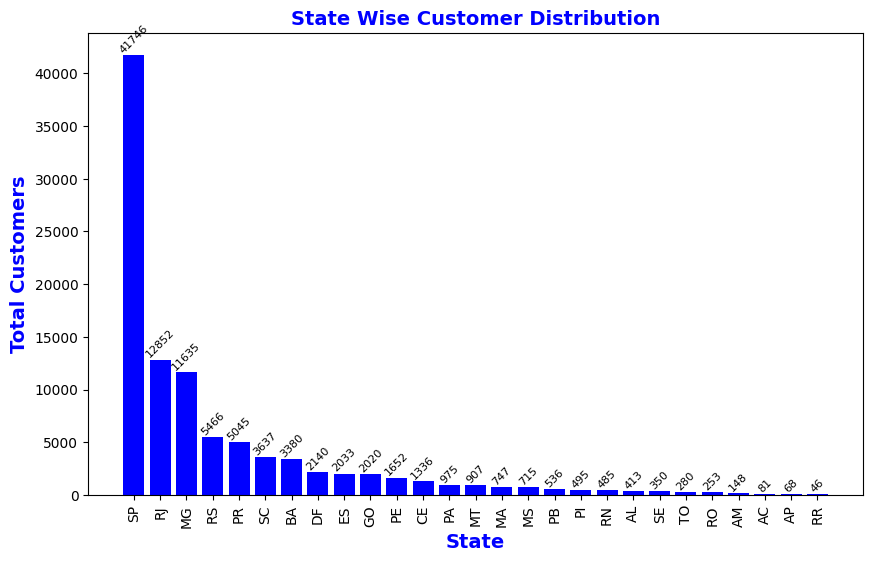

In [35]:
# ============== Let's show it using dataframe (can be easy to plot)
sc_df = pd.DataFrame(cust_from_state, columns=["State", "Count"])
sc_df = sc_df.sort_values(by = "Count" , ascending= False)  # Put in ascending order of count
#=-=== plot using bar graph
plt.figure(figsize=(10, 6))   # default : plt.figure(figsize=(6.4, 4.8)) -> width = 6.4 , height 4.8
plt.bar(sc_df["State"], sc_df["Count"], color="blue")
# Add data labels
for i, val in enumerate(sc_df["Count"]):
    plt.text(i, val + 0.8, str(val), ha='center', va='bottom',rotation = 45, fontsize=8, color='black')

# === to remove overlapping of state(labels on x axis), we rotate them from horinzontal to vertical
plt.xticks(rotation= 90)
plt.title("State Wise Customer Distribution", fontsize=14, fontweight='bold', color="blue")
plt.xlabel("State", fontsize=14, color='blue', fontweight='bold')
plt.ylabel("Total Customers", fontsize=14, color='blue', fontweight='bold')
plt.show()

# **Deep Extractions...........**

**1. =================== Number of orders per month in 2018. ===============**

In [14]:
query = """SELECT MONTHNAME(order_purchase_timestamp) AS Month, COUNT(*) AS order_count
FROM orders
WHERE YEAR(order_purchase_timestamp) = 2018
GROUP BY Month
ORDER BY Month;"""

cursor.execute(query)
data = cursor.fetchall()
data

[('April', 6939),
 ('August', 6512),
 ('February', 6728),
 ('January', 7269),
 ('July', 6292),
 ('June', 6167),
 ('March', 7211),
 ('May', 6873),
 ('October', 4),
 ('September', 16)]

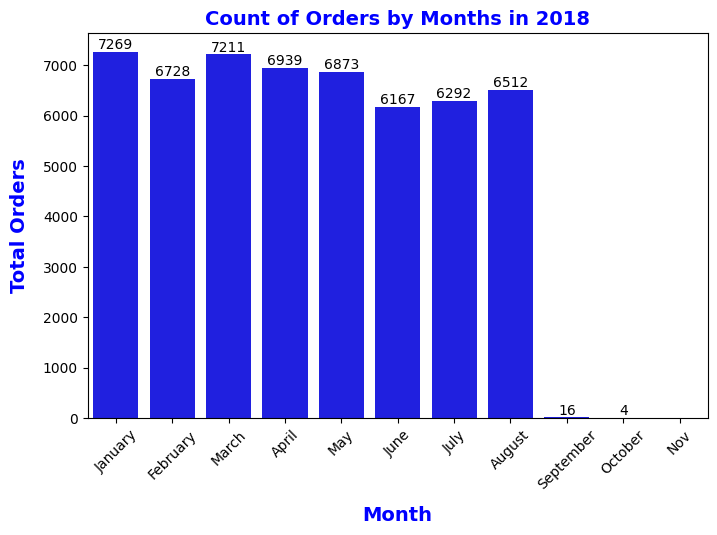

In [15]:
#======== making it into dataframe form to plot easily
df = pd.DataFrame(data, columns = ["Months", "Total Orders"])
# For custom order of months -> in below bar chart
ord = ["January", "February","March","April","May","June","July","August","September","October" , "Nov"]
plt.figure(figsize=(8,5))
ax = sns.barplot(data = df, x = df["Months"],y =  df["Total Orders"], order = ord, color = "blue")
ax.bar_label(ax.containers[0])  # For bar labels
plt.xticks(rotation = 45)
plt.title("Count of Orders by Months in 2018", fontsize=14, fontweight='bold', color="blue")
# Customize X and Y labels
ax.set_xlabel("Month", fontsize=14, fontweight='bold', labelpad=10, color="blue")
ax.set_ylabel("Total Orders", fontsize=14, fontweight='bold', labelpad=10, color="blue")

plt.show()

 **2. ========== Average number of products per order, grouped by customer city. ==========**

In [16]:
query = """WITH per_order_count AS (           # No of products/order ordered by each customer
	SELECT orders.order_id, customer_id, COUNT(order_items.order_id) AS order_count
	FROM orders INNER JOIN order_items
	ON orders.order_id = order_items.order_id
	GROUP BY order_id, customer_id
    )
SELECT cust.customer_city, ROUND(AVG(poc.order_count),2) AS Average_Orders
FROM customers AS cust
INNER JOIN per_order_count AS poc
ON cust.customer_id = poc.customer_id
GROUP BY cust.customer_city
ORDER BY Average_Orders DESC
LIMIT 10;"""

cursor.execute(query)
data = cursor.fetchall()
#==== show it using dataframe
df = pd.DataFrame(data, columns = ["Customer city", "Average products/order"])
print("Top 10 cities with max orders...")
df

Top 10 cities with max orders...


,Customer city,Average products/order
0,padre carvalho,7.00
1,celso ramos,6.50
2,datas,6.00
3,candido godoi,6.00
4,matias olimpio,5.00
5,cidelandia,4.00
6,picarra,4.00
7,morro de sao paulo,4.00
8,curralinho,4.00
9,teixeira soares,4.00


**3.=== Calculate the percentage of total revenue contributed by each product category. ===**

In [17]:
query = """SELECT UPPER(p.product_category) AS Product_Category, 
    ROUND(SUM(pmt.payment_value)/(SELECT SUM(payment_value) FROM payments) * 100 , 2 ) AS Percentage_Dist
    FROM products AS p
    INNER JOIN 
    order_items AS oi
    ON p.product_id = oi.product_id
    INNER JOIN payments AS pmt
    ON pmt.order_id = oi.order_id
    GROUP BY p.product_category
    ORDER BY Percentage_Dist DESC;"""

cursor.execute(query)
data = cursor.fetchall()

#=== let's show iyt using dataframe
df = pd.DataFrame(data, columns= ["Product Category", "Percentage Distribution"])
df.head(10)

,Product Category,Percentage Distribution
0,BED TABLE BATH,10.70
1,HEALTH BEAUTY,10.35
2,COMPUTER ACCESSORIES,9.90
3,FURNITURE DECORATION,8.93
4,WATCHES PRESENT,8.93
5,SPORT LEISURE,8.70
6,HOUSEWARES,6.84
7,AUTOMOTIVE,5.32
8,GARDEN TOOLS,5.24
9,COOL STUFF,4.87


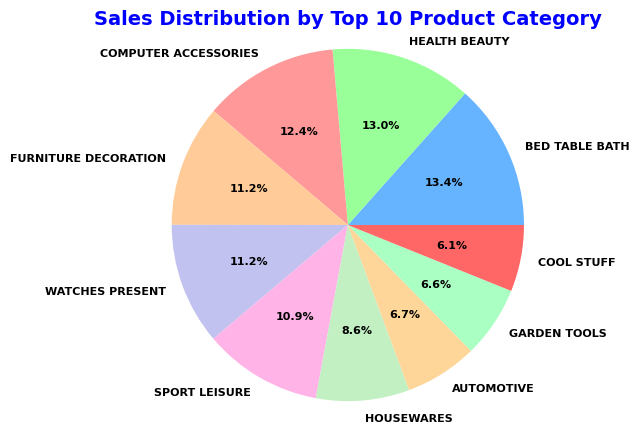

In [18]:
#======= let's show top 10 contributors using pie chart
top_10 = df.head(10)
top_10
# Create pie chart
plt.figure(figsize=(5, 5))
colors = ["#66b3ff", "#99ff99", "#ff9999", "#ffcc99", "#c2c2f0", "#ffb3e6", "#c2f0c2", "#ffd699", "#aaffc3", "#ff6666"]
lable = top_10.iloc[:,0]  # Labels as 1st column (i.e., product category)
plt.pie(
    top_10["Percentage Distribution"],
    labels= lable,
    colors=colors,
    autopct='%1.1f%%',
    textprops={'fontsize': 8, 'fontweight': 'bold'}
)

plt.title('Sales Distribution by Top 10 Product Category', fontsize=14, fontweight='bold', color="blue")
plt.axis('equal')  # Equal aspect ratio to make it circular
plt.show()

**4.===================== Correlation between product price and the number of times a product has been purchased (Impact of price on purchase) ======================**

In [19]:
query = """SELECT p.product_category, 
COUNT(oi.product_id) AS total_orders , ROUND(AVG(oi.price),2) AS Avg_Price   # Finding no of orders & avg price for each catregory
FROM products AS p
INNER JOIN order_items AS oi
ON p.product_id = oi.product_id
GROUP BY p.product_category;"""

cursor.execute(query)
data = cursor.fetchall()

# ========= let's seee in dataframe
df = pd.DataFrame(data, columns=["Product Category", "Order Count", "Avg Price"])
df

# ======== We have to check "impact of price on orders"
orders = df["Order Count"]
price = df["Avg Price"]

c_cf = np.corrcoef([orders,price])   # Ignore diagonal values 
print("Correlation between Price and Orders placed by customers: ", c_cf[0][1])

Correlation between Price and Orders placed by customers:  -0.10631514167157562


*Insight: There is weak correlation between price and orders, however when price inceases these is slight decrease in orders.*

**5.=== Total revenue generated by each seller, and ranking them by revenue. ===**

In [10]:
query = """ SELECT *, DENSE_RANK() OVER(order by Revenue DESC) AS Ranking
FROM (
    SELECT oi.seller_id, ROUND(SUM(p.payment_value),2) AS Revenue
	FROM order_items AS oi
	INNER JOIN
	payments AS p
	ON oi.order_id = p.order_id
	GROUP BY oi.seller_id) AS Rev_By_Sellers;"""

cursor.execute(query)
data = cursor.fetchall()

df = pd.DataFrame(data, columns=["Seller_id","Revenue", "Ranking"])
df.tail(10)

,Seller_id,Revenue,Ranking
3085,34aefe746cd81b7f3b23253ea28bef39,22.52,3071
3086,b5f0712d22a873b6797ab6cc65c3fcba,21.28,3072
3087,cc1f04647be106ba74e62b21f358af25,20.19,3073
3088,c1dde11f12d05c478f5de2d7319ad3b2,19.89,3074
3089,3ac588cd562971392504a9e17130c40b,19.29,3075
3090,ad14615bdd492b01b0d97922e87cb87f,19.21,3076
3091,702835e4b785b67a084280efca355756,18.56,3077
3092,4965a7002cca77301c82d3f91b82e1a9,16.36,3078
3093,77128dec4bec4878c37ab7d6169d6f26,15.22,3079
3094,cf6f6bc4df3999b9c6440f124fb2f687,12.22,3080


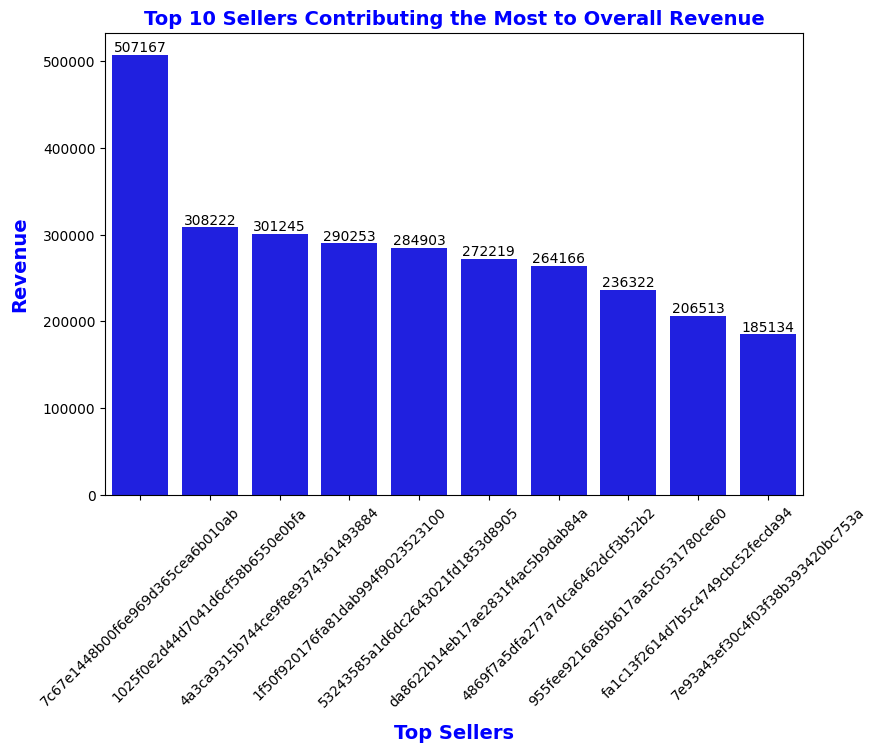

In [21]:
# ==== Let's see top 5 sellers
top_sellers = df.head(10)
plt.figure(figsize=(9,6))
ax = sns.barplot(top_sellers, x="Seller_id", y ="Revenue", color="blue")
ax.bar_label(ax.containers[0])
# Customize X and Y labels
ax.set_xlabel("Top Sellers", fontsize=14, fontweight='bold',color="blue", labelpad=10)
ax.set_ylabel("Revenue", fontsize=14, fontweight='bold', color="blue", labelpad=10)
plt.xticks(rotation=45)
plt.title("Top 10 Sellers Contributing the Most to Overall Revenue", fontsize=14, fontweight='bold', color="blue")
plt.show()

In [ ]:
import pandas as pd
import mysql.connector
# ============ Create connection to mysql database
conn = mysql.connector.connect(
    host="localhost",
    user="root",
    password="UMMU@112244",
    database = "target_ecommerce_db"
)

#====== Correlation between Price & Ordering behaiour
q8 = """SELECT p.product_category, 
COUNT(oi.product_id) AS total_orders , ROUND(AVG(oi.price),2) AS Avg_Price   # Finding no of orders & avg price for each catregory
FROM products AS p
INNER JOIN order_items AS oi
ON p.product_id = oi.product_id
GROUP BY p.product_category;"""

Corr_betw_price_orders = pd.read_sql(q8, conn)

# **Detailed Insights...........**


**1.=== Moving average of order values for each customer over their order history. ===**

In [22]:
query = """ 
SELECT customer_id, order_purchase_timestamp, payment_value,
ROUND(AVG(payment_value) OVER( partition by customer_id order by order_purchase_timestamp
								ROWS BETWEEN 2 PRECEDING AND CURRENT ROW),2) AS Running_Avg     # ROWS BETWEEN 2 PRECEDING AND CURRENT ROW -> take avg of last 2 and current row avg for particular customer (otherwise it will take avg of all purchases of part cust & give same value as running avg)
FROM(
	SELECT o.customer_id, o.order_purchase_timestamp, p.payment_value
    FROM orders AS o
    INNER JOIN payments AS p
    ON p.order_id = o.order_id
    ) AS cust_paymnt_details;"""

cursor.execute(query)
data = cursor.fetchall()
# Fetch column names
cls = [desc[0] for desc in cursor.description]  # cursor.description -> contain column desc & desc[0] gives heading(1st row)

# Create DataFrame with column names
df = pd.DataFrame(data, columns= cls)
df.head(20)

,customer_id,order_purchase_timestamp,payment_value,Running_Avg
0,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.74
1,000161a058600d5901f007fab4c27140,2017-07-16 09:40:32,67.41,67.41
2,0001fd6190edaaf884bcaf3d49edf079,2017-02-28 11:06:43,195.42,195.42
3,0002414f95344307404f0ace7a26f1d5,2017-08-16 13:09:20,179.35,179.35
4,000379cdec625522490c315e70c7a9fb,2018-04-02 13:42:17,107.01,107.01
5,0004164d20a9e969af783496f3408652,2017-04-12 08:35:12,71.80,71.80
6,000419c5494106c306a97b5635748086,2018-03-02 17:47:40,49.40,49.40
7,00046a560d407e99b969756e0b10f282,2017-12-18 11:08:30,166.59,166.59
8,00050bf6e01e69d5c0fd612f1bcfb69c,2017-09-17 16:04:44,85.23,85.23
9,000598caf2ef4117407665ac33275130,2018-08-11 12:14:35,1255.71,1255.71


**2.=========  Cumulative sales per month for each year. ===**

In [23]:
query= """ 
SELECT year, month, ROUND(sales,2) AS Sales,
ROUND(SUM(sales) OVER(ORDER BY year, month),2) AS Commulative_sales
FROM(
	SELECT YEAR(o.order_purchase_timestamp) AS year,
    MONTH(o.order_purchase_timestamp) AS month, SUM(p.payment_value) AS sales
    FROM orders AS o
    INNER JOIN payments AS p
    ON o.order_id = p.order_id
    GROUP BY year, month
    order by year, month) AS Year_Month_Payment;"""

cursor.execute(query)
data = cursor.fetchall()
# let's see in dataframe

# ---- fetch column names
cls = [desc[0] for desc in cursor.description]
df = pd.DataFrame(data, columns= cls)
df

,year,month,Sales,Commulative_sales
0,2016,9,252.24,252.24
1,2016,10,59090.48,59342.72
2,2016,12,19.62,59362.34
3,2017,1,138488.04,197850.38
4,2017,2,291908.01,489758.39
5,2017,3,449863.60,939621.99
6,2017,4,417788.03,1357410.02
7,2017,5,592918.82,1950328.84
8,2017,6,511276.38,2461605.22
9,2017,7,592382.92,3053988.14


**3.=========  year-over-year growth rate of total sales. ===** <br>
Formulla:
YoY Growth Rate (%) =  Sales_current_year - Sales_Previous_Year / sales_Previous_year   * 100

In [12]:
query = """ 
WITH Yearly_Sales AS (
	SELECT YEAR(o.order_purchase_timestamp) AS year, ROUND(SUM(p.payment_value),2) AS revenue
    FROM orders AS o
    INNER JOIN payments AS p
    on o.order_id = p.order_id
    GROUP BY year
	) 
SELECT year,revenue, 
   ROUND(
   (revenue - LAG(revenue,1) OVER(ORDER BY year) ) / 
   LAG(revenue,1) OVER(ORDER BY year) * 100,
   3) AS YoY_Growth
FROM Yearly_Sales; """

cursor.execute(query)
data = cursor.fetchall()

# Fetch column names
cls = [desc[0] for desc in cursor.description]  # cursor.description -> contain column desc & desc[0] gives heading(1st row)

# Create DataFrame with column names
df = pd.DataFrame(data, columns= cls) 
df

,year,revenue,YoY_Growth
0,2016,59362.34,NaN
1,2017,7249746.73,12112.704
2,2018,8699763.05,20.001


**4.=========  Retention rate of customers, defined here as the percentage of customers who make another purchase within 6 months of their first purchase. ===** <br>


In [25]:
query = """ 
WITH first_order AS (
    SELECT 
        customer_id,
        MIN(order_purchase_timestamp) AS first_purchase
    FROM orders
    GROUP BY customer_id
),
repeat_orders AS (
    SELECT 
        o.customer_id
    FROM orders o
    JOIN first_order f ON o.customer_id = f.customer_id
    WHERE o.order_purchase_timestamp > f.first_purchase
      AND o.order_purchase_timestamp <= DATE_ADD(f.first_purchase, INTERVAL 6 MONTH)
),
total_customers AS (
    SELECT COUNT(DISTINCT customer_id) AS total FROM first_order
),
retained_customers AS (
    SELECT COUNT(DISTINCT customer_id) AS retained FROM repeat_orders
)
SELECT 
    rc.retained / tc.total * 100 AS retention_rate_percentage
FROM retained_customers rc, total_customers tc;"""

cursor.execute(query)
data = cursor.fetchall()

# Fetch column names
cls = [desc[0] for desc in cursor.description]  # cursor.description -> contain column desc & desc[0] gives heading(1st row)

# Create DataFrame with column names
df = pd.DataFrame(data, columns= cls)
df

,retention_rate_percentage
0,0.0000


**5========= Top 5 customers who spent the most money in each year.  ===** <br>

C:\Users\umarm\AppData\Local\Temp\ipykernel_3268\4016258980.py:22: UserWarning: The palette list has more values (5) than needed (3), which may not be intended.
  ax = sns.barplot(x = "customer_id", y = "Revenue", data = df, hue = "years" , palette=blue_shades)


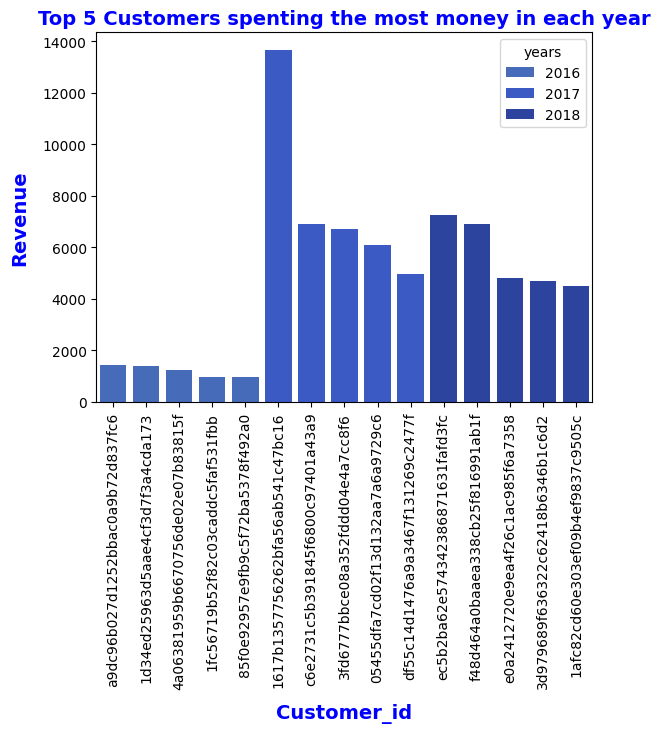

In [13]:
query = """ SELECT years, customer_id, Revenue, Ranking
from (
	SELECT year(orders.order_purchase_timestamp) years, orders.customer_id,
     SUM(payments.payment_value) Revenue,
     DENSE_RANK() OVER(PARTITION BY YEAR(orders.order_purchase_timestamp) ORDER BY SUM(payments.payment_value) DESC) Ranking
     from orders join payments 
     ON payments.order_id = orders.order_id
     GROUP BY years, orders.customer_id) as ranking_cust
where Ranking <= 5 ;"""

cursor.execute(query)
data = cursor.fetchall()

# Fetch column names
cls = [desc[0] for desc in cursor.description]  # cursor.description -> contain column desc & desc[0] gives heading(1st row)

# Create DataFrame for barplot
df = pd.DataFrame(data, columns= cls)

#=== plot it
blue_shades = ["#3366cc", "#254eda", "#1a39b2", "#10288a", "#081b5b"]
ax = sns.barplot(x = "customer_id", y = "Revenue", data = df, hue = "years" , palette=blue_shades)
# Customize X and Y labels
ax.set_xlabel("Customer_id", fontsize=14, fontweight='bold', color="blue", labelpad=10)
ax.set_ylabel("Revenue", fontsize=14, fontweight='bold', color="blue", labelpad=10)
plt.xticks(rotation=90)
plt.title("Top 5 Customers spenting the most money in each year", fontsize=14, fontweight='bold', color="blue")
plt.show()